<a href="https://colab.research.google.com/github/marcusRB/uoc-ub-bioinformatics-programming-language/blob/master/03_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programación para la Bioinformática

Unidad 3: Librerías científicas en Python - Scipy - Ejercicios
-------------------------------------------------

## Etiquetas

Bienvenidos a la PEC de la unidad 3. Bajo estas lineas encontrareis Ejercicios y preguntas cada uno de ellos tendrá una etiqueta que indica los recursos necesarios para resolverlos. Hay tres posibles etiquetas:



* **<font color="green" size="+2">MU</font>** **Materiales unidad**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura.

* **<font color="blue" size="+2">EG</font>** **Consulta externa guiada**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de como encontrar la información adicional necesaria.

* **<font color="gold" size="+2">CI</font>** **Consulta externa independiente**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, y el enunciado no incluye las indicaciones de como encontrar la información adicional. El estudiante deberá buscar esta información independientemente.

## Tests

Antes de nada, decir que en el ámbito de la programación es muy común utilizar tests (llamados tests unitarios) durante la codificación de los programas. Los tests sirven para saber si un programa se comporta como se espera. Es decir, sirven para validar la funcionalidad del programa, no para determinar la calidad del código.

Así pues, los tests son un gran aliado del programador. Es por eso que la mayoría de los ejercicios e incluso alguna de las preguntas tendran una celda bajo ellas con un comentario en la primera línea con el título: `# Test Ejercicio X` o `Test Pregunta X`

**IMPORTANTE**: **no debéis modificar las celdas de test**.

Si las ejecutáis, lo que CoLab hará será ejecutar el test correspondiente sobre vuestro código. Dependiendo del resultado, sabréis que:

* Si el test falla, entonces vuestro código no funciona como se espera. Así pues, tendréis que corregirlo.

* Si el test no falla, entonces vuestro código se comporta como se espera. Sin embargo, esto no significa que el el ejercicio sea correcto, ya que hay situaciones en las que se pide usar una determinada función o estructura. Por ejemplo, imaginad que se pide resolver un ejercicio usando un ``for`` y, en su lugar, usáis un ``while``. Pues seguramente vuestro programa pasaría el test (porque funciona como se espera), pero no respeta un requisito del enunciado.

**Para poder ejecutar los tests primero debéis ejecutar la siguiente celda de código**: (Tan solo una vez por sesión)

In [ ]:
!pip install ipytest
import ipytest
ipytest.autoconfig()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.5 MB/s eta 0:00:00


###**Ejercicios evaluables**

A continuación tenéis el único ejercicio a resolver en esta parte del módulo. Dada la especificidad de los algoritmos que se implementan en la librería Scipy, hemos seleccionado un problema más simple que los mostrados como ejemplo.

### Ejercicio 1: Calculando los átomos en la interfaz de unión de dos proteínas **<font color="gold" size="+2">CI</font>**
Dos proteínas A y B se unen para formar un complejo proteico. Se define la interfaz de unión entre A y B como los átomos de A que están a una distancia de 4Å (Angstroms) o menos de cualquier átomo de B. En la siguiente figura, la proteína A está representada en azul y la proteína B en naranja. Los átomos de B que están en contacto con algún átomo de A se han coloreado en verde:


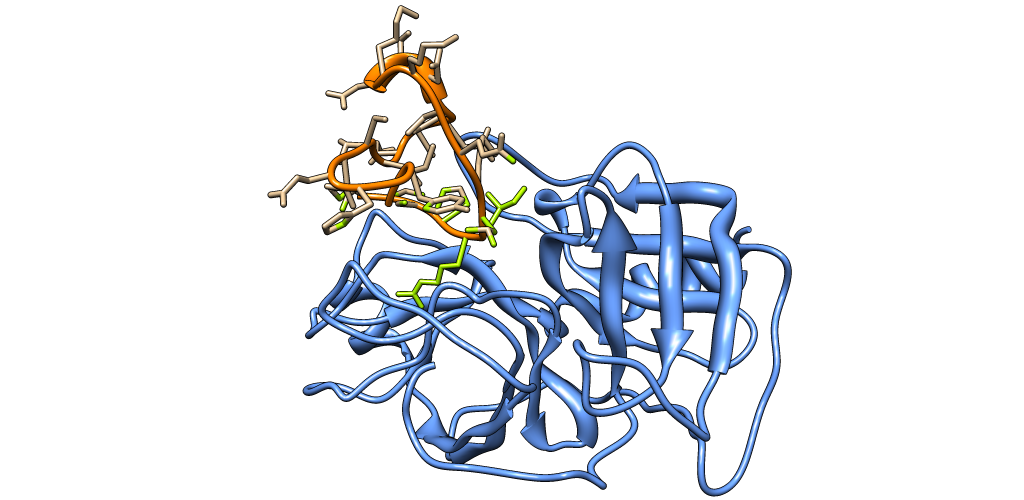

A continuación, tenéis el código que tendréis que completar. Tenéis que calcular el número de átomos de A y de B que están en contacto con átomos de B y de A respectivamente y el número total de átomos en la interfaz. **Pista**: podéis utilizar la función _[scipy.spatial.distance.cdist](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist)_ y la función _numpy.where_.


# Atención:

Una duda muy común en el apartado de Scipy de la PEC3 es si el número de átomos de la proteína A en contacto con la proteína B es el mismo que el número de átomos de la proteína B en contacto con la proteína A?

La respuesta es **no**, no es el mismo número. Hay que eliminar los átomos repetidos.

Es decir en el caso hipotético:
* Tenemos 2 proteínas protA y protB.
* ProtA tiene 2 átomos A1 y A2.
* ProtB tiene 3 átomos B1, B2 y B3.
* A1 está aislado y no está en contacto con ningún átomo de protB.
* A2 está en contacto con B1 y B3.
* B2 está aislado y no está en contacto con nadie.


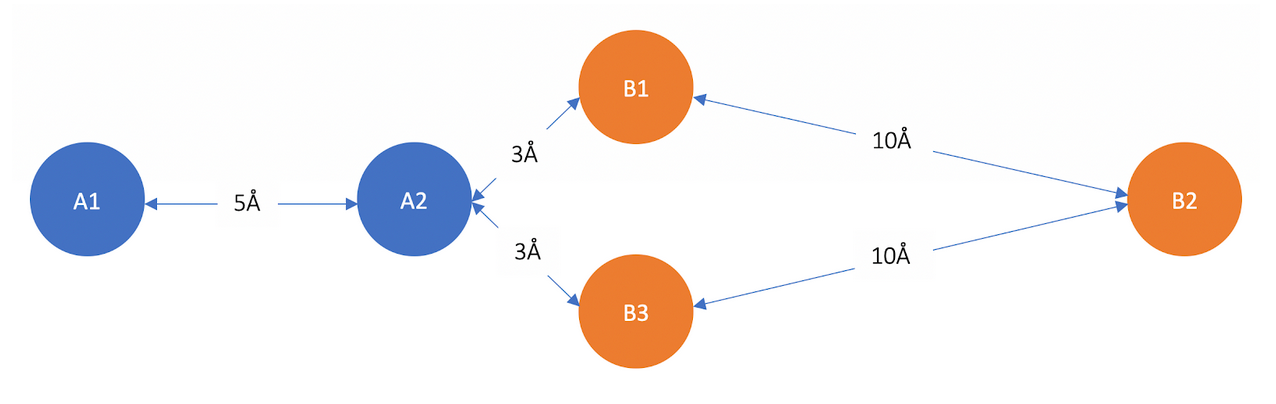

En el escenario planteado en el ejemplo:

* Contactos (<4A) de A - B: 2 [ A2 -- B1, A2 -- B3 ]
* Contactos (<4A) de B - A: 2 [ B1 -- A2, B3 -- A2 ]

Pero lo que se pide en la PEC es:

* **Número de átomos de A en contacto con B: 1** [ A2 ]
* **Número de átomos de B en contacto con A: 2** [ B1, B3 ]

In [ ]:
import numpy as np
import os
import scipy.spatial


def lee_coordenadas_atomo(linea):
    """Interpreta las coordenadas de una línea de un fichero PDB que empiece por
    ATOM (es un átomo)"""
    if linea.startswith('ATOM  '):
        x = float(linea[30:38])
        y = float(linea[38:46])
        z = float(linea[46:54])
        return [x, y, z]


def obtiene_coordenadas(estructura):
    """Lee una estructura (fichero PDB) y obtiene las coordenadas de los
    átomos que contiene"""
    coordenadas = []
    with open(estructura) as input:
        lineas = [linea.rstrip(os.linesep) for linea in input.readlines()]
        for linea in lineas:
            atomo = lee_coordenadas_atomo(linea)
            if atomo:
                coordenadas.append(atomo)
    return np.array(coordenadas)

# Descargando datos
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/5ky3_chainA.pdb --no-check-certificate
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/5ky3_chainB.pdb --no-check-certificate

# Coordenadas_1 tiene las coordenadas de la proteína A en formato numpy
coordenadas_1 = obtiene_coordenadas('5ky3_chainA.pdb')

# Coordenadas_2 tiene las coordenadas de la proteína B en formato numpy
coordenadas_2 = obtiene_coordenadas('5ky3_chainB.pdb')

# Completar código
# Aqui vuestra solución

"""
Using the spatial distance to calculate the metric Euclidian distance between
two arrays, coords_1 and coords_2, we are able to get the first array as result
to match Atoms_A and Atoms_B
"""
dist = scipy.spatial.distance.cdist(coordenadas_1, coordenadas_2, metric='euclidean', )

"""
After the distance calculation, we check all atoms between two vectors
which the distance is less or equals to 4 angstrom. We get the index for
the first vector coords_1 and the second vector coords_2
"""
idx_coords_1, idx_coords_2 = np.where(dist <= 4)

"""
Finally, we check only the unique values per each vector coord_1
and coord_2, then, we aggregate the final count value.
"""
atoms_A_B = 0
atoms_A_B += len(np.unique(idx_coords_1))
print("Número de átomos de A en contacto con B: ", atoms_A_B)

atoms_B_A = 0
atoms_B_A += len(np.unique(idx_coords_2))
print("Número de átomos de B en contacto con A: ", atoms_B_A)

# Finalmente, el número de átomos total será la suma de ambos:
print("Número total de átomos en contacto: ", atoms_A_B + atoms_B_A)

File ‘5ky3_chainA.pdb’ already there; not retrieving.

File ‘5ky3_chainB.pdb’ already there; not retrieving.

Número de átomos de A en contacto con B:  213
Número de átomos de B en contacto con A:  159
Número total de átomos en contacto:  372


In [ ]:
%%ipytest
import pytest
# Test Exercici Scipy
def test_atoms_contacte():
  assert atoms_A_B == 213
  assert atoms_B_A == 159
  assert atoms_A_B + atoms_B_A == 372

.                                                                                            [100%]
1 passed in 0.02s


**Autoria**

Autores/as que han participado colectivamente en esta obra:


*   Pau Andrio Balado
*   Brian Jiménez García
*   Melchor Sanchez Martinez
*   Alba Nin Hill
* Xavier Grau-Bové

**Fecha de creación**


*   Ultima modificación: Octubre 2025